In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import anndata
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)

In [3]:
corr_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/DMRGeneCorr/TotalGeneDMRCorrLoop.0.3.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
reptile_adata = anndata.read_h5ad(
    '/home/hanliu/project/mouse_rostral_brain/REPTILE/result/REPTILE_scores.subtype.h5ad'
)
enhancer_hits = pd.Series((reptile_adata.X > 0).sum(axis=1).A1, index=reptile_adata.obs_names)


In [5]:
total_corr_data = corr_data[corr_data['DMR'].isin(enhancer_hits[enhancer_hits > 0].index)].copy()
total_corr_data.reset_index(drop=True, inplace=True)

In [6]:
corr_data = total_corr_data[(total_corr_data['Corr'] < -0.5) & (
    total_corr_data['DMR_to_gene_dist'].abs() < 500000)].sample(
        100000).reset_index(drop=True)

In [7]:
total_corr_data[(total_corr_data['Corr'] < -0.5) & (
    total_corr_data['DMR_to_gene_dist'].abs() < 500000)].shape

(127379, 5)

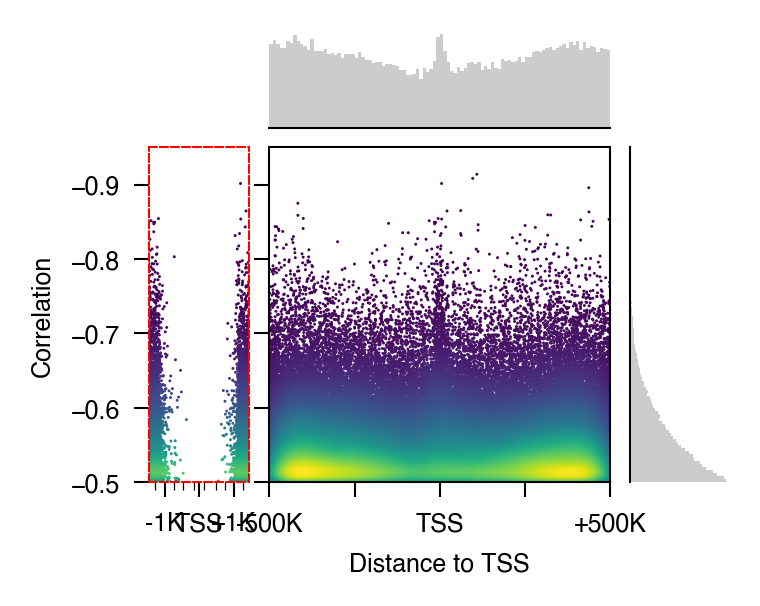

In [8]:
fig = plt.figure(figsize=(2.5, 2), dpi=300)

gs = fig.add_gridspec(4, 5)
ax_zoomin = fig.add_subplot(gs[1:4, :1])
ax_main = fig.add_subplot(gs[1:4, 1:4])
ax_ydist = fig.add_subplot(gs[1:4, 4:5])
ax_xdist_main = fig.add_subplot(gs[0, 1:4])

ax = ax_main
x = corr_data['DMR_to_gene_dist']
y = corr_data['Corr']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.5,
                linewidth=0)

ax.set_xlim(-500000, 500000)
ax.set(yticklabels=[],
       ylabel='', xlabel='Distance to TSS',
       xticklabels=['-500K', '', 'TSS', '', '+500K'])
rect = patches.Rectangle((-25000,0.505), 50000, 0.440, linewidth=0.5, linestyle='--',
                         edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.set_ylim(-0.5, -0.95)
ax.legend_.set_visible(False)

ax = ax_zoomin
sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.5,
                linewidth=0)
ax.set_ylim(-0.5, -0.95)
ax.set_xscale('symlog')
ax.set_xlim(-50000, 50000)
ax.set(ylabel='Correlation',
       xlabel='',
       xticks=[-1000, 0, 1000],
       xticklabels=['-1K', 'TSS', '+1K'])
ax.spines['left'].set(color='red', linestyle='--')
ax.spines['right'].set(color='red', linestyle='--')
ax.spines['top'].set(color='red', linestyle='--')
ax.spines['bottom'].set(color='red', linestyle='--')
ax.legend_.set_visible(False)

ax = ax_ydist
sns.distplot(ax=ax,
             a=corr_data['Corr'],
             vertical=True,
             kde=False,
             bins=100,
             color='gray')
ax.set(xticks=[], yticks=[], yticklabels=[], ylabel='', ylim=ax_main.get_ylim())
sns.despine(ax=ax, bottom=True)

ax = ax_xdist_main
_data = corr_data['DMR_to_gene_dist']
_data = _data[(_data > -500000) & (_data < 500000)]
sns.distplot(ax=ax, a=_data, kde=False, bins=100, color='gray')
ax.set(xticks=[],
       xticklabels=[],
       yticks=[],
       yticklabels=[],
       ylabel='',
       xlabel='', xlim=ax_main.get_xlim())
sns.despine(ax=ax, left=True)


## Label part

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

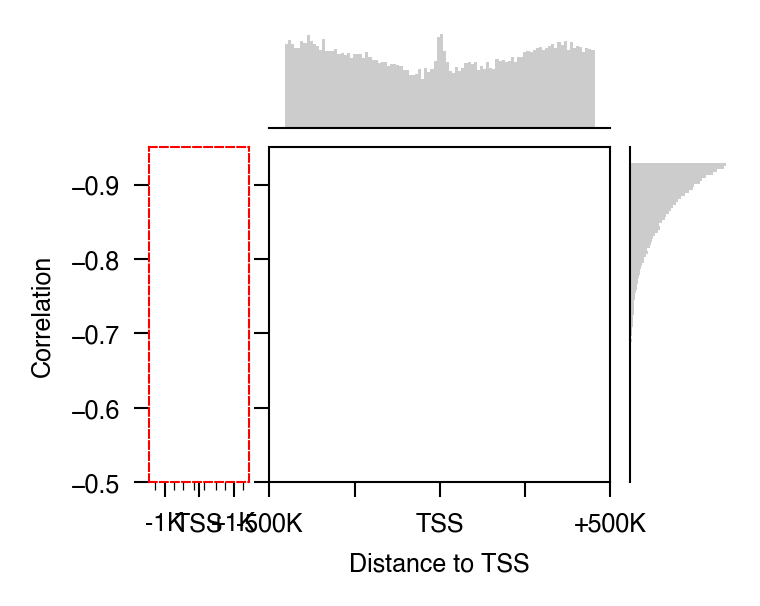

In [10]:
fig = plt.figure(figsize=(2.5, 2), dpi=300)

gs = fig.add_gridspec(4, 5)
ax_zoomin = fig.add_subplot(gs[1:4, :1])
ax_main = fig.add_subplot(gs[1:4, 1:4])
ax_ydist = fig.add_subplot(gs[1:4, 4:5])
ax_xdist_main = fig.add_subplot(gs[0, 1:4])

ax = ax_main
# Generate fake data
x = corr_data['DMR_to_gene_dist']
y = corr_data['Corr']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.1,
                linewidth=0)
ax.collections[0].remove()

ax.set_xlim(-500000, 500000)
ax.set(yticklabels=[],
       ylabel='', xlabel='Distance to TSS',
       xticklabels=['-500K', '', 'TSS', '', '+500K'])
rect = patches.Rectangle((-25000,0.505), 50000, 0.440, linewidth=0.5, linestyle='--',
                         edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.set_ylim(-0.5, -0.95)
ax.legend_.set_visible(False)

ax = ax_zoomin
sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.5,
                linewidth=0)
ax.set_ylim(-0.5, -0.95)
ax.collections[0].remove()
ax.set_xscale('symlog')
ax.set_xlim(-50000, 50000)
ax.set(ylabel='Correlation',
       xlabel='',
       xticks=[-1000, 0, 1000],
       xticklabels=['-1K', 'TSS', '+1K'])
ax.spines['left'].set(color='red', linestyle='--')
ax.spines['right'].set(color='red', linestyle='--')
ax.spines['top'].set(color='red', linestyle='--')
ax.spines['bottom'].set(color='red', linestyle='--')
ax.legend_.set_visible(False)

ax = ax_ydist
sns.distplot(ax=ax,
             a=corr_data['Corr'],
             vertical=True,
             kde=False,
             bins=100,
             color='gray')
ax.set(xticks=[], yticks=[], yticklabels=[], ylabel='')
sns.despine(ax=ax, bottom=True)

ax = ax_xdist_main
_data = corr_data['DMR_to_gene_dist']
_data = _data[(_data > -500000) & (_data < 500000)]
sns.distplot(ax=ax, a=_data, kde=False, bins=100, color='gray')
ax.set(xticks=[],
       xticklabels=[],
       yticks=[],
       yticklabels=[],
       ylabel='',
       xlabel='')
sns.despine(ax=ax, left=True)

fig.savefig('Correlation_dist.negative_corr.label_part.pdf')

## Scatter part

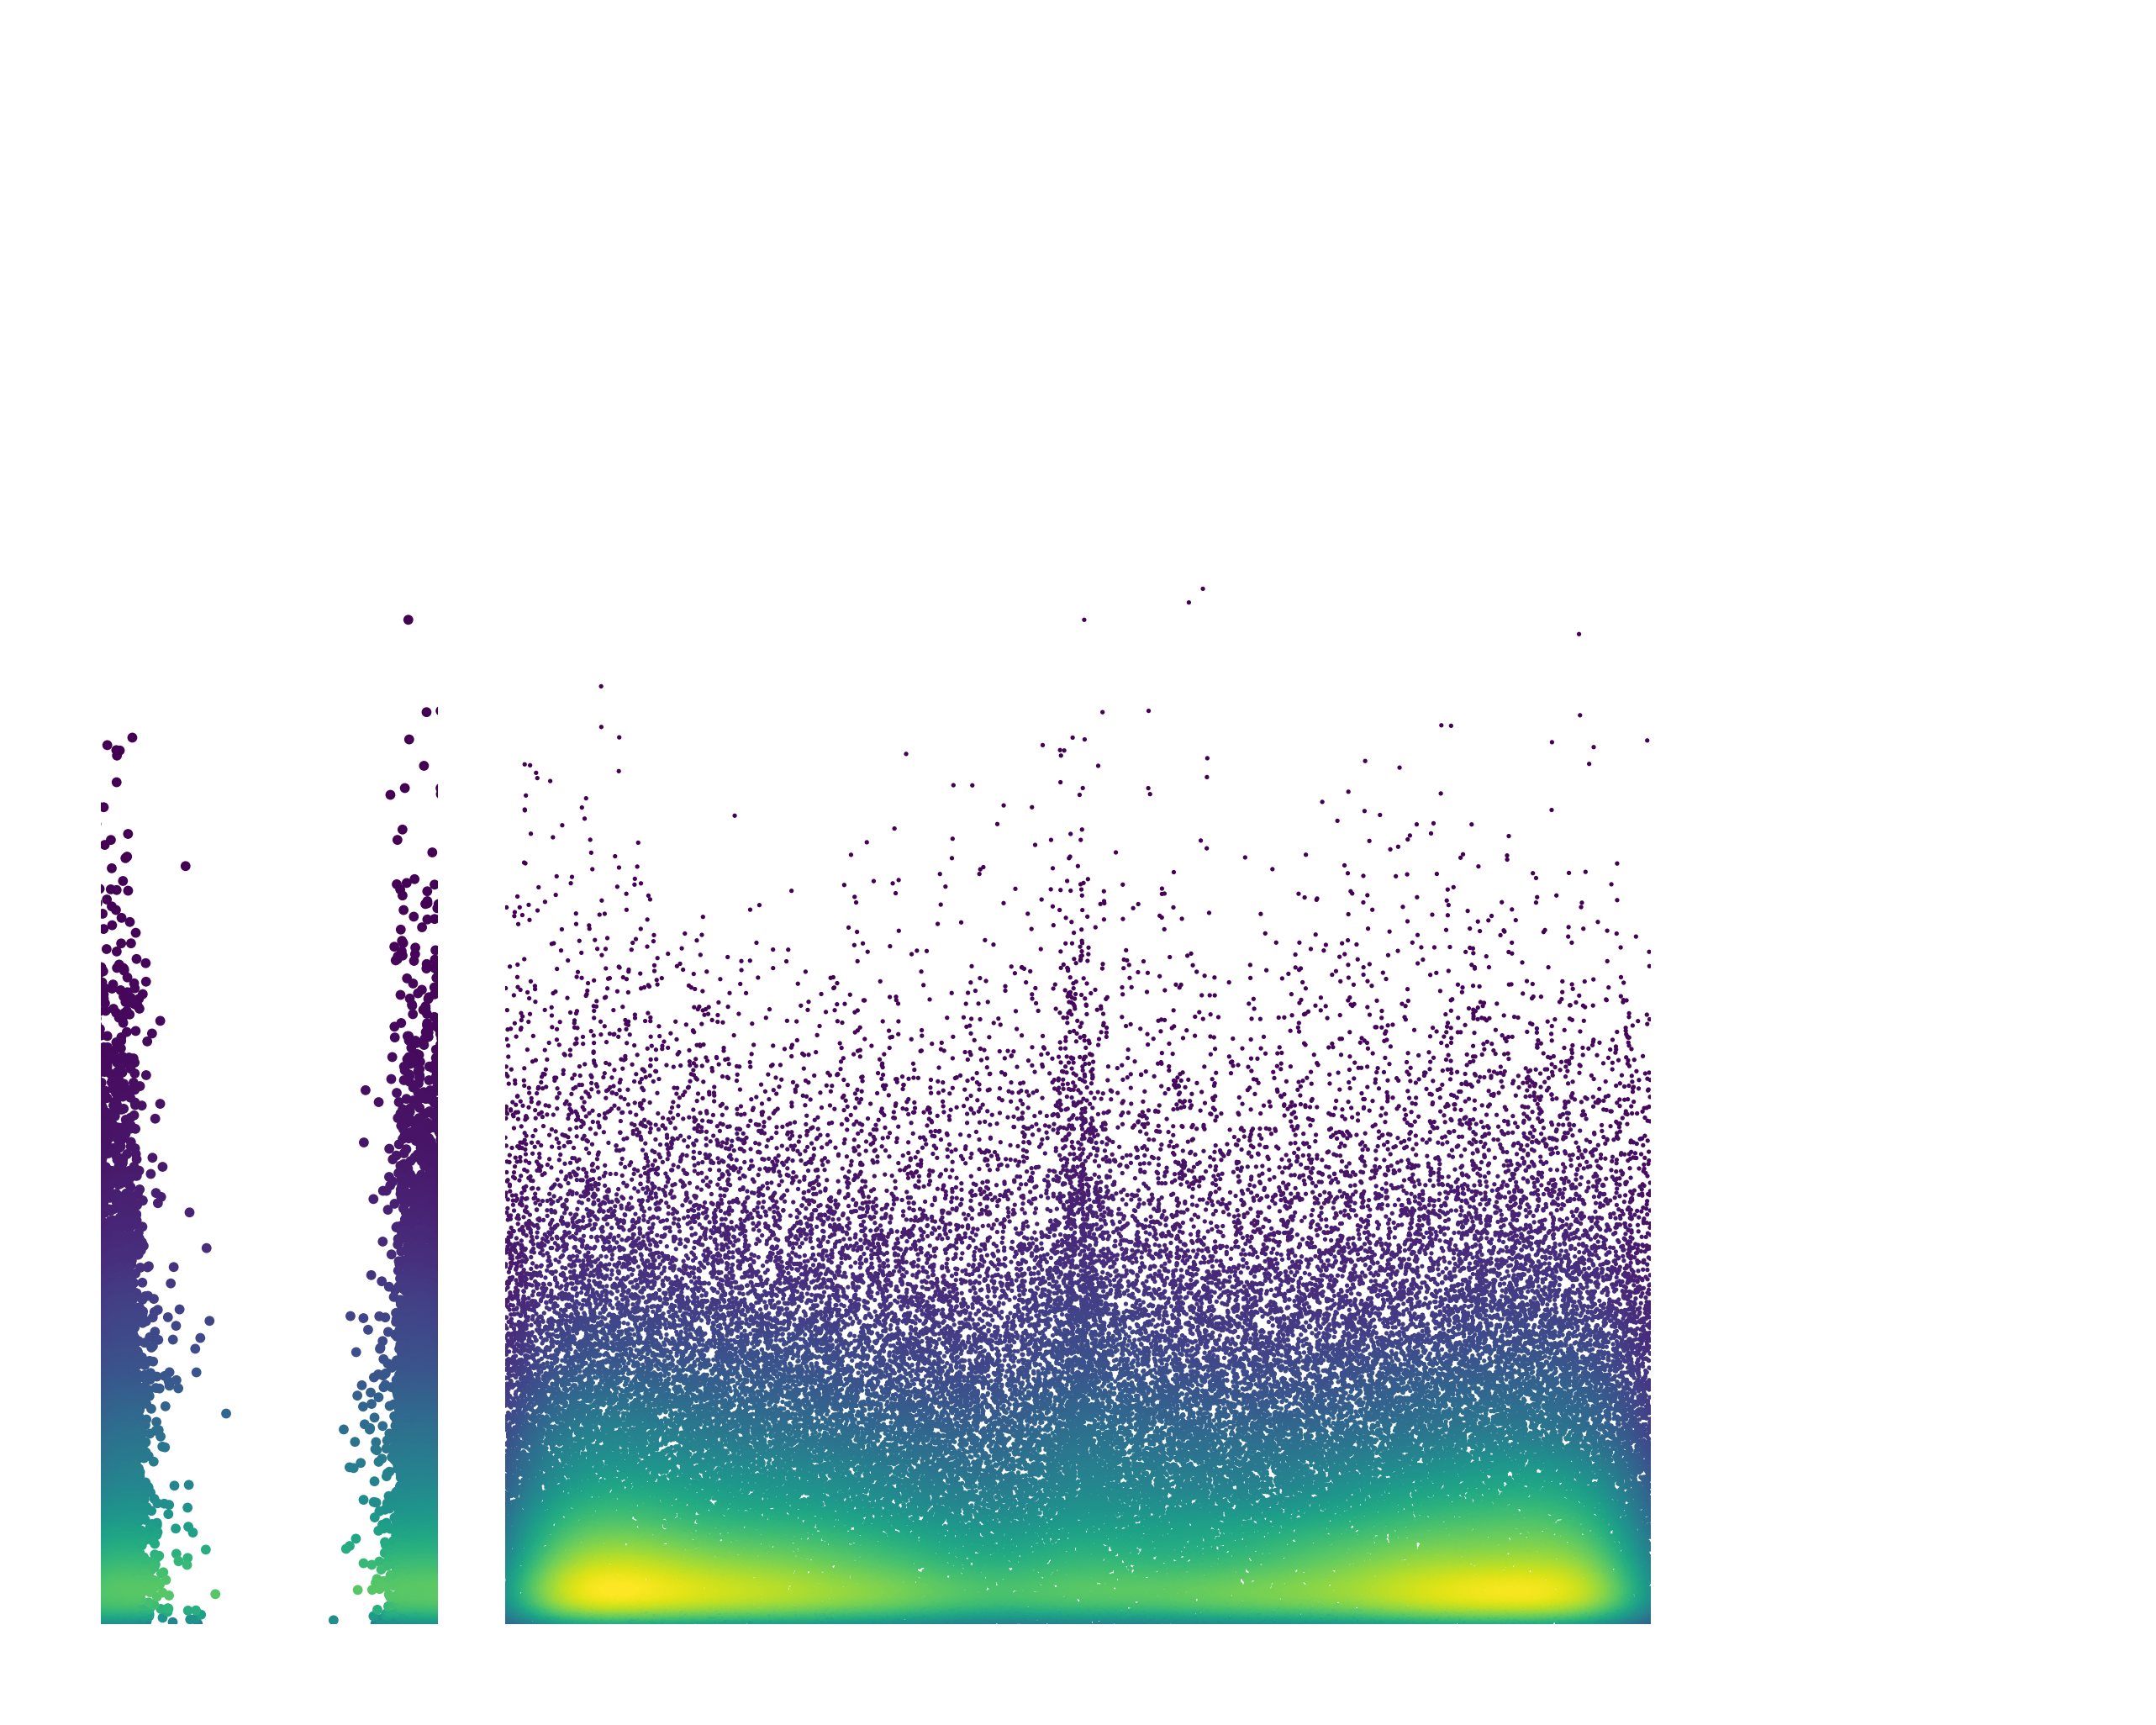

In [11]:
fig = plt.figure(figsize=(2.5, 2), dpi=1200)

gs = fig.add_gridspec(4, 5)
ax_zoomin = fig.add_subplot(gs[1:4, :1])
ax_main = fig.add_subplot(gs[1:4, 1:4])
ax_ydist = fig.add_subplot(gs[1:4, 4:5])
ax_xdist_main = fig.add_subplot(gs[0, 1:4])

ax = ax_main
# Generate fake data
x = corr_data['DMR_to_gene_dist']
y = corr_data['Corr']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.1,
                linewidth=0)
ax.set_xlim(-500000, 500000)
ax.axis('off')
ax.set_ylim(-0.5, -0.95)
ax.legend_.set_visible(False)

ax = ax_zoomin
sns.scatterplot(ax=ax,
                x=x,
                y=y,
                hue=z,
                palette='viridis',
                s=0.5,
                linewidth=0)
ax.set_ylim(-0.5, -0.95)
ax.set_xscale('symlog')
ax.set_xlim(-50000, 50000)
ax.axis('off')
ax.legend_.set_visible(False)

ax = ax_ydist
ax.axis('off')

ax = ax_xdist_main
ax.axis('off')

fig.savefig('Correlation_dist.negative_corr.scatter_part.png')